# <center><b> <em> Feature Engineering </em> </b></center>

### <font color="green"> | - Import des Biblio et Dataframe</font>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [49]:
# Définir une fonction de conversion pour la colonne datetime
def parse_datetime(date_string):
    return pd.to_datetime(date_string)

# Spécifier les types de données et les convertisseurs
dtype = {'invoice': str, 'object': int, 'stock_code': object, 'description': object, 'quantity': int, 'unit_price': float, 'customer_id': object, 'country': object}
converters = {'invoice_date': parse_datetime}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
data = pd.read_csv("../data/silver.csv", dtype=dtype, converters=converters)

# Vérifier les types de données
print(data.dtypes)

invoice                 object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id             object
country                 object
dtype: object


In [50]:
data.tail()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1033031,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1033032,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1033033,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1033034,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1033035,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [51]:
data.describe()

,quantity,unit_price
count,1.033036e+06,1.033036e+06
mean,1.007688e+01,4.613980e+00
std,1.751976e+02,1.223975e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


### <font color="green"> || - Ajout column Total Price </font>

In [52]:
data["total_price"] = data["quantity"] * data["unit_price"]

In [53]:
data.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


### <font color="green"> ||| - RFM Analysis </font>

## <font color="purple"> 
 - <b> Recency </b> : the number of days between today_date and the last purchase date of this customer  

 - <b> Frequency </b> : the number of purchase of this customer  

 - <b> Monetary </b> : sum of TotalPrice of this customer 

 
 </font>


In [54]:
today_date = dt.datetime(2011, 12, 11)

In [55]:
rfm = data.groupby('customer_id').agg({'invoice_date': lambda invoice_date: (today_date - invoice_date.max()).days,
                                     'invoice': lambda invoice: invoice.nunique(),
                                     'total_price': lambda total_price: total_price.sum()})

In [56]:
rfm.head()
#ajout pourcentage cancelled
#kmeans num et kproto mixte 
#passer de 800 à 500 mill faire un groupe by par cluster après (savoir qeu'estce qui caractérise un cluster en faisant une moy, describe....)  (justif pour la méthode du coude pour enlever ou ajouter un cluster)
#utiliser ACP pour visualiser les variables 4 (hue par cluster)

,invoice_date,invoice,total_price
customer_id,,,
12346.0,326,17,-51.74
12347.0,3,8,4921.53
12348.0,76,5,2019.40
12349.0,19,5,4404.54
12350.0,311,1,334.40


In [64]:
rfm.shape

(5942, 3)

In [76]:
df_cancelled = data[data["invoice"].str.contains("C", na=False)]
df_cancelled.head(6)

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,-15.0


In [81]:
# Calculer le nombre total de produits achetés par client
total_products = data.groupby("customer_id").size()

# Calculer le nombre de produits annulés par client
cancelled_products = df_cancelled.groupby("customer_id").size()

# Calculer le pourcentage de churn out pour chaque client
churn_out_percentage = (cancelled_products / total_products) * 100

# Créer un DataFrame à partir des résultats
churn_out_df = churn_out_percentage.to_frame(name="Churn_Out_Percentage")

# Réinitialiser l'index du DataFrame
churn_out_df.reset_index(inplace=True)

In [73]:
total_products

customer_id
12346.0     47
12347.0    222
12348.0     51
12349.0    180
12350.0     17
          ... 
18283.0    938
18284.0     29
18285.0     12
18286.0     70
18287.0    156
Length: 5942, dtype: int64

In [74]:
cancelled_products

customer_id
12346.0    13
12349.0     5
12352.0    10
12359.0    10
12360.0     1
           ..
18280.0     2
18282.0     1
18284.0     1
18286.0     3
18287.0     1
Length: 2572, dtype: int64

In [82]:
# Remplacer les NaN par 0
churn_out_df["Churn_Out_Percentage"].fillna(0, inplace=True)

     customer_id  Churn_Out_Percentage
0        12346.0             27.659574
1        12347.0              0.000000
2        12348.0              0.000000
3        12349.0              2.777778
4        12350.0              0.000000
...          ...                   ...
5937     18283.0              0.000000
5938     18284.0              3.448276
5939     18285.0              0.000000
5940     18286.0              4.285714
5941     18287.0              0.641026

[5942 rows x 2 columns]


In [83]:
churn_out_df.head()

,customer_id,Churn_Out_Percentage
0,12346.0,27.659574
1,12347.0,0.000000
2,12348.0,0.000000
3,12349.0,2.777778
4,12350.0,0.000000


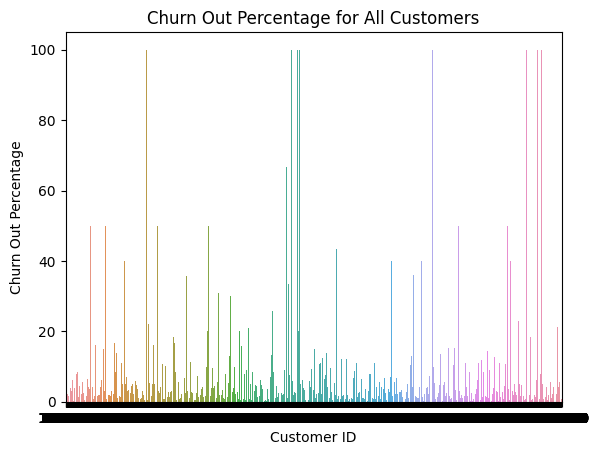

In [84]:
# Filtrer les clients avec un pourcentage de churn non nul
non_zero_churn_customers = churn_out_df[churn_out_df["Churn_Out_Percentage"] > 0]

# Créer le graphique à barres avec Seaborn
sns.barplot(x="customer_id", y="Churn_Out_Percentage", data=non_zero_churn_customers)

# Définir les étiquettes des axes
plt.xlabel("Customer ID")
plt.ylabel("Churn Out Percentage")

# Définir le titre du graphique
plt.title("Churn Out Percentage for All Customers")

# Afficher le graphique
plt.show()

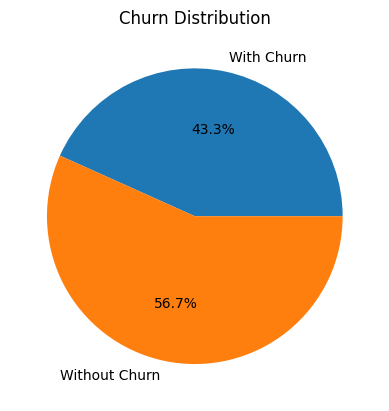

In [85]:
import matplotlib.pyplot as plt

# Calculer le nombre de clients avec churn et sans churn
with_churn = len(churn_out_df[churn_out_df["Churn_Out_Percentage"] > 0])
without_churn = len(churn_out_df[churn_out_df["Churn_Out_Percentage"] == 0])

# Créer les données pour le graphique
churn_data = [with_churn, without_churn]
labels = ["With Churn", "Without Churn"]

# Créer le graphique circulaire
plt.pie(churn_data, labels=labels, autopct='%1.1f%%')

# Définir le titre du graphique
plt.title("Churn Distribution")

# Afficher le graphique
plt.show()

In [87]:
df_price = data.groupby("customer_id").agg({"total_price": [lambda x: abs(x).sum(), lambda x: x[x < 0].sum()]}) 
df_price.columns = ['payed_amount', 'refund_amount']
df_price

,payed_amount,refund_amount
customer_id,,
12346.0,155164.66,-77608.20
12347.0,4921.53,0.00
12348.0,2019.40,0.00
12349.0,4452.84,-24.15
12350.0,334.40,0.00
...,...,...
18283.0,2664.90,0.00
18284.0,486.68,-25.00
18285.0,427.00,0.00


### <font color="green"> V - Export gold Data </font>

In [58]:
#EXporter la data dans un Csv 
rfm.to_csv('../data/rfm_data.csv', index=False)